In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

In [3]:
file_path = r"C:\ymy Data\Panadas\my-venv\DEPI_PROJECT\cleaned_data.xlsx"  # Replace with your CSV file path
data = pd.read_excel(file_path)
df = data

In [4]:
display(data.head())

# Display the first few rows of the DataFrame

,ORDERNUMBER,PRODUCTNAME,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,Street King,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small
1,10121,Turbo Racer,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small
2,10134,Retro Chopper,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium
3,10145,Turbo Racer,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium
4,10159,Speedster Bike,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,Brown,Julie,Medium


In [5]:
data.info()
# Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   PRODUCTNAME       2823 non-null   object        
 2   QUANTITYORDERED   2823 non-null   int64         
 3   PRICEEACH         2823 non-null   float64       
 4   ORDERLINENUMBER   2823 non-null   int64         
 5   SALES             2823 non-null   float64       
 6   ORDERDATE         2823 non-null   datetime64[ns]
 7   STATUS            2823 non-null   object        
 8   QTR_ID            2823 non-null   int64         
 9   MONTH_ID          2823 non-null   int64         
 10  YEAR_ID           2823 non-null   int64         
 11  PRODUCTLINE       2823 non-null   object        
 12  MSRP              2823 non-null   int64         
 13  PRODUCTCODE       2823 non-null   object        
 14  CUSTOMERNAME      2823 n

In [6]:
data.drop(columns=['ORDERNUMBER']).describe()
# Summary statistics for numerical columns

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [7]:
print("shape of data: ", data.shape)
print("columns of data: ", data.columns)


shape of data:  (2823, 23)
columns of data:  Index(['ORDERNUMBER', 'PRODUCTNAME', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


**What is the total sales revenue for each year?**

In [8]:
# Group by YEAR_ID and calculate total SALES
total_sales_by_year = data.groupby("YEAR_ID")["SALES"].sum()


# Format the results for display
formatted_sales = total_sales_by_year.apply(lambda x: f"${x:,.2f}")

# Display the result
print("Total Sales Revenue by Year:")
display(formatted_sales)

# Filter data for the year 2005
data_2005 = data[data["YEAR_ID"] == 2005]

# Get the number of unique months in 2005
unique_months_2005 = data_2005["MONTH_ID"].nunique()
print("months of 2005: ",unique_months_2005)

Total Sales Revenue by Year:


YEAR_ID
2003    $3,516,979.54
2004    $4,724,162.60
2005    $1,791,486.71
Name: SALES, dtype: object

months of 2005:  5


With $4.72M, 2004 had the highest total sales—likely your best-performing year overall.
since we only have 5 months of 2005 it's unfair to say that sales dropped and if trends continue we could say that it could reach  $4.3M or more.

**Which month has the highest total sales?**

In [9]:
# Group by MONTH_ID and sum SALES
total_sales_by_month = data.groupby("MONTH_ID")["SALES"].sum()
display(total_sales_by_month.apply(lambda x: f"${x:,.2f}"))

# Find the month with the highest sales
max_sales_month = total_sales_by_month.idxmax()
max_sales_value = total_sales_by_month.max()

# Display the result
print(f"The month with the highest total sales is Month {max_sales_month} with sales of ${max_sales_value:,.2f}.")


MONTH_ID
1       $785,874.44
2       $810,441.90
3       $754,501.39
4       $669,390.96
5       $923,972.56
6       $454,756.78
7       $514,875.97
8       $659,310.57
9       $584,724.27
10    $1,121,215.22
11    $2,118,885.67
12      $634,679.12
Name: SALES, dtype: object

The month with the highest total sales is Month 11 with sales of $2,118,885.67.


Month 11 (November) has the highest total sales: $2.1M+
This likely indicates:
Holiday season spike (e.g., Black Friday, pre-Christmas buying).


**What is the best-selling product based on the quantity ordered?**

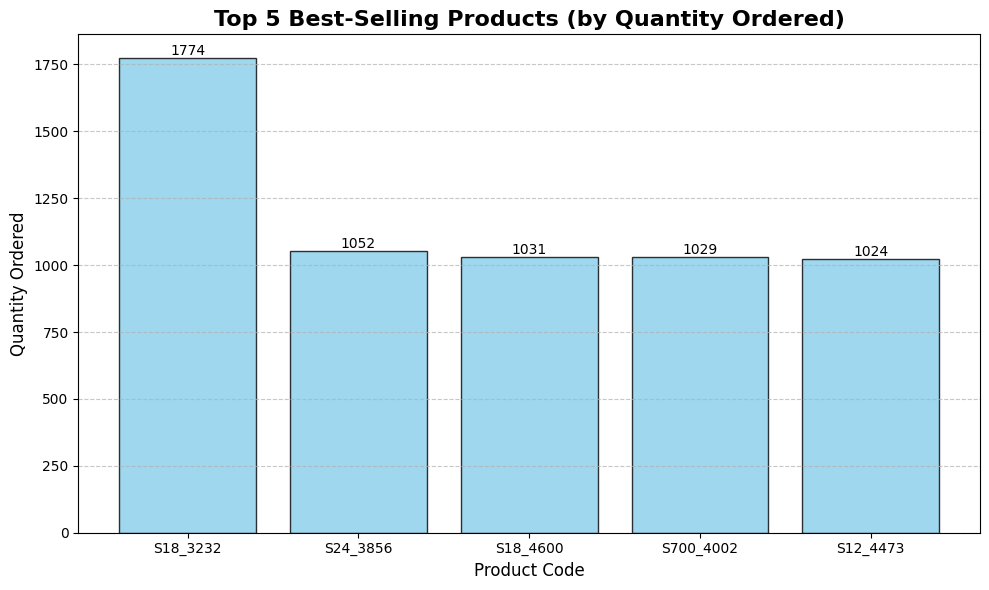

In [10]:
# Grouping by 'PRODUCTCODE' and summing 'QUANTITYORDERED'
best_selling_products = df.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

# Extracting the top 5 products
top_5_products = best_selling_products.head(5)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar Chart
bars = ax.bar(
    top_5_products.index, 
    top_5_products.values, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.8
)

# Adding labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f"{int(height)}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Chart Configuration
ax.set_title('Top 5 Best-Selling Products (by Quantity Ordered)', fontsize=16, weight='bold')
ax.set_xlabel('Product Code', fontsize=12)
ax.set_ylabel('Quantity Ordered', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [11]:
total_quantity_by_product =df.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum()

# Find the product with the highest quantity ordered
best_selling_product = total_quantity_by_product.idxmax()
highest_quantity = total_quantity_by_product.max()
# Display the result
print(f"PRICEEACH for '{best_selling_product}': ${data[data['PRODUCTCODE'] == best_selling_product]['PRICEEACH'].iloc[0]}")
print(f"The best-selling product is '{best_selling_product}' with {highest_quantity} units sold.")

PRICEEACH for 'S18_3232': $100.0
The best-selling product is 'S18_3232' with 1774 units sold.


Given that this product is the best-seller, we might want to understand why it is so popular. Does it offer features that make it stand out in the market (better quality, affordable price, or innovation)?

**What is the average order value?**

In [12]:

# Calculate the average order value
average_order_value = data["SALES"].mean()
average_order_quantity = data['QUANTITYORDERED'].mean()

# Display the result
print(f"The average quantity value is {average_order_quantity:,.2f} units.")
print(f"The average order value is ${average_order_value:,.2f}.")

The average quantity value is 35.09 units.
The average order value is $3,553.89.


based on all the insights I get uptil now I can say "The best-selling product, S18_3232, sold 1,774 units and is priced at $100, making it a high-volume, low-cost item. Given that our average order value is $3,553.89 and the average quantity per order is 35.09 units, this suggests that our customers are purchasing in bulk, consistent with a B2B sales model. These customers are likely resellers or workshop owners restocking inventory. This insight supports a strategy focused on bulk pricing, inventory reliability, and personalized service for high-volume buyers."

**Which product line generates the most revenue?**

In [13]:
# Group by PRODUCTLINE and sum SALES
total_sales_by_product_line = data.groupby("PRODUCTLINE")["SALES"].sum()
# Find the product line with the highest sales
top_product_line = total_sales_by_product_line.idxmax()
highest_revenue = total_sales_by_product_line.max()

display(total_sales_by_product_line)


PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

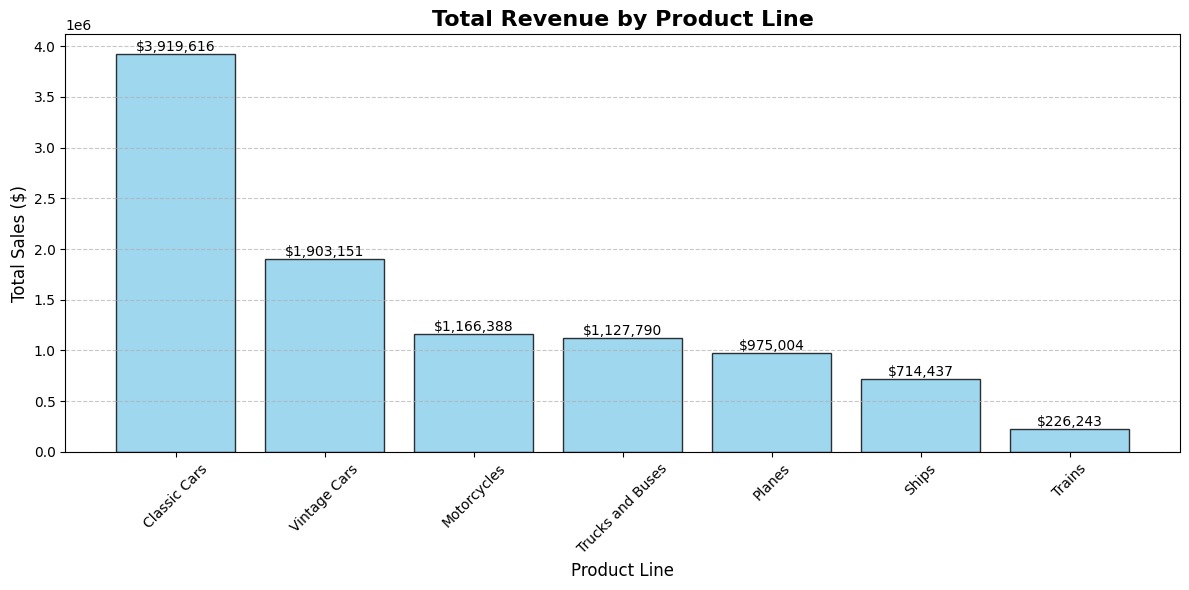

The product line that generates the most revenue is 'Classic Cars' with total sales of $3,919,615.66.


In [14]:
# Grouping data by 'PRODUCTLINE' and calculating total sales for each product line
product_line_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar Chart
bars = ax.bar(
    product_line_sales.index, 
    product_line_sales.values, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.8
)

# Adding labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f"${height:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Chart Configuration
ax.set_title('Total Revenue by Product Line', fontsize=16, weight='bold')
ax.set_xlabel('Product Line', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
# Display the result
print(f"The product line that generates the most revenue is '{top_product_line}' with total sales of ${highest_revenue:,.2f}.")


Classic Cars leads with a total of $3,919,615.66, indicating that this product line is by far the most profitable.
The demand for classic car models is significantly higher than for other categories, which could be driven by factors like nostalgia, collectability, or popularity among certain customer segments.

**How does MSRP compare to actual sales price (PRICEEACH)?**

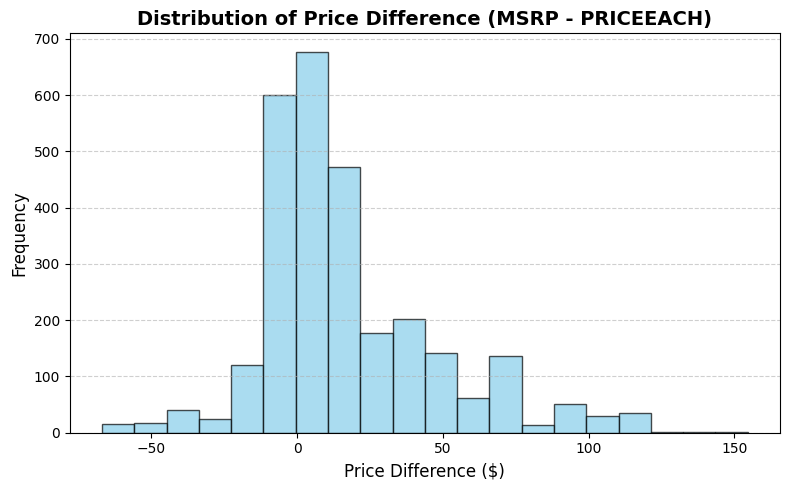

In [15]:
# Calculate the price difference
data["Price Difference"] = data["MSRP"] - data["PRICEEACH"]
plt.figure(figsize=(8, 5))
plt.hist(data["Price Difference"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)

# Add labels and title
plt.title("Distribution of Price Difference (MSRP - PRICEEACH)", fontsize=14, fontweight="bold")
plt.xlabel("Price Difference ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

1. Most Products Sold Near MSRP
The peak of the distribution is centered around a small positive price difference (0 to $20), meaning:

- Most products were sold close to their MSRP (Manufacturer's Suggested Retail Price).

- This suggests minimal discounting, which can be a sign of strong demand or controlled pricing strategy.

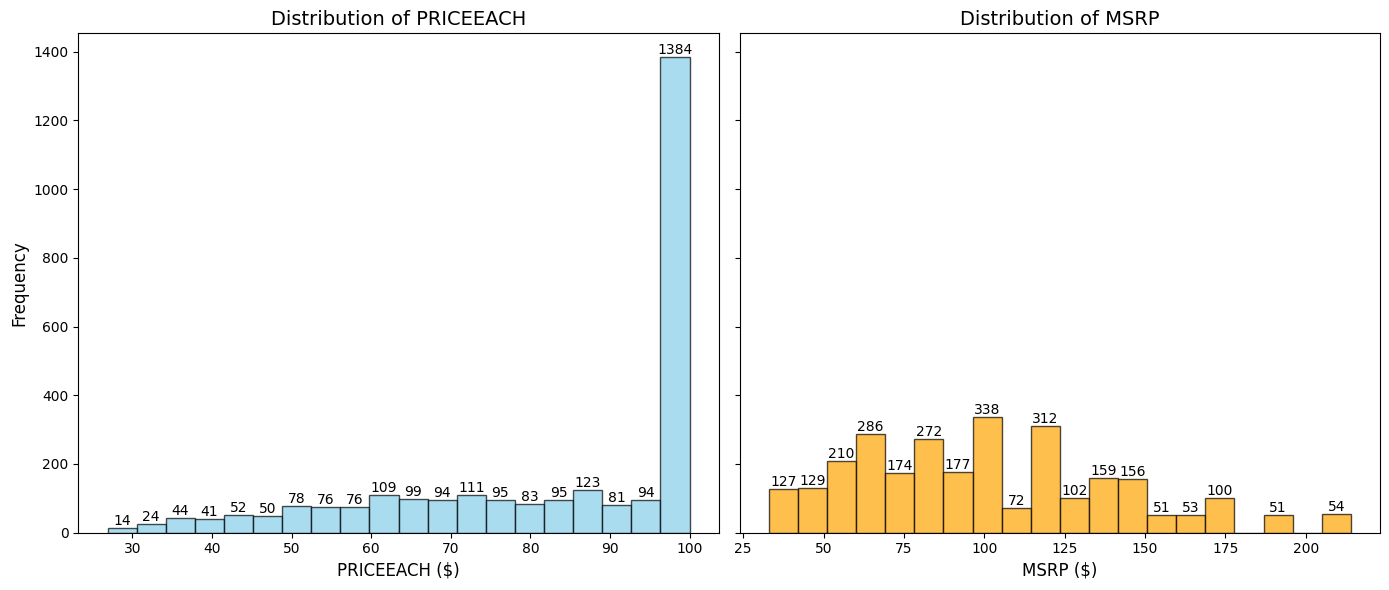

In [16]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the histogram for PRICEEACH
price_bins = axes[0].hist(df['PRICEEACH'], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
axes[0].set_title("Distribution of PRICEEACH", fontsize=14)
axes[0].set_xlabel("PRICEEACH ($)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(False)

# Add labels to each bin in PRICEEACH
for i in range(len(price_bins[0])):
    height = price_bins[0][i]
    if height > 0:  # Skip empty bins
        axes[0].text(price_bins[1][i] + (price_bins[1][1] - price_bins[1][0]) / 2, height, int(height), 
                     ha='center', va='bottom', fontsize=10, color='black')

# Plot the histogram for MSRP
msrp_bins = axes[1].hist(df['MSRP'], bins=20, color="orange", edgecolor="black", alpha=0.7)
axes[1].set_title("Distribution of MSRP", fontsize=14)
axes[1].set_xlabel("MSRP ($)", fontsize=12)
axes[1].grid(False)

# Add labels to each bin in MSRP
for i in range(len(msrp_bins[0])):
    height = msrp_bins[0][i]
    if height > 0:  # Skip empty bins
        axes[1].text(msrp_bins[1][i] + (msrp_bins[1][1] - msrp_bins[1][0]) / 2, height, int(height), 
                     ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



The data shows most products are sold at mid-range prices ($95–$123), while MSRPs vary widely, suggesting strategic discounts. Higher MSRPs may create a premium perception, but actual sales cluster around consistent price points, indicating standardized pricing or targeted promotions.  

In [17]:
total_quantity_by_product = data.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum()

# Find the most frequently ordered product
most_frequent_product = total_quantity_by_product.idxmax()
highest_quantity = total_quantity_by_product.max()

# Display the result
print(f"The most frequently ordered product is '{most_frequent_product}' with a total quantity of {highest_quantity}.")

The most frequently ordered product is 'S18_3232' with a total quantity of 1774.


**Which country has the highest sales?**


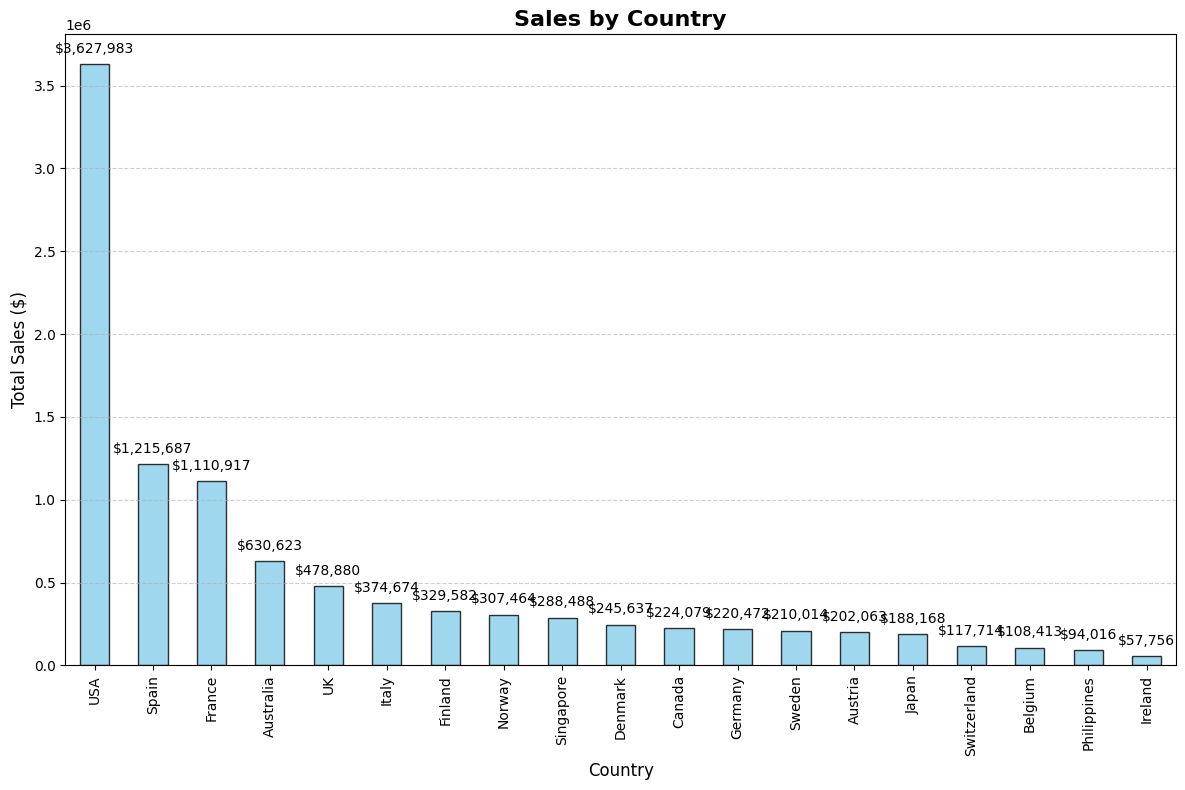

In [18]:
# Group by COUNTRY and sum up the SALES (if needed, already grouped here)
sales_by_country = data.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)

# Plotting the sales by country
plt.figure(figsize=(12, 8))
bars = sales_by_country.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.8)

# Adding title and labels
plt.title("Sales by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

# Adding labels on the bars
for index, value in enumerate(sales_by_country):
    plt.text(index, value + 50000, f"${value:,.0f}", ha='center', va='bottom', fontsize=10)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout for better display
plt.tight_layout()

# Display the chart
plt.show()



1. **USA Leads Sales**: The USA contributes the highest sales, indicating it is the primary market.
2. **Key Secondary Markets**: Spain and France follow, making them significant but secondary markets.
3. **Low Sales in Other Countries**: Several countries have minimal sales, representing either untapped or less-penetrated markets.
4. **Strategic Focus**: Efforts should aim to:

   * Sustain market dominance in the USA.
   * Increase sales in Spain and France.
   * Explore growth opportunities in smaller markets for diversification.

**What is the average order quantity per customer?**

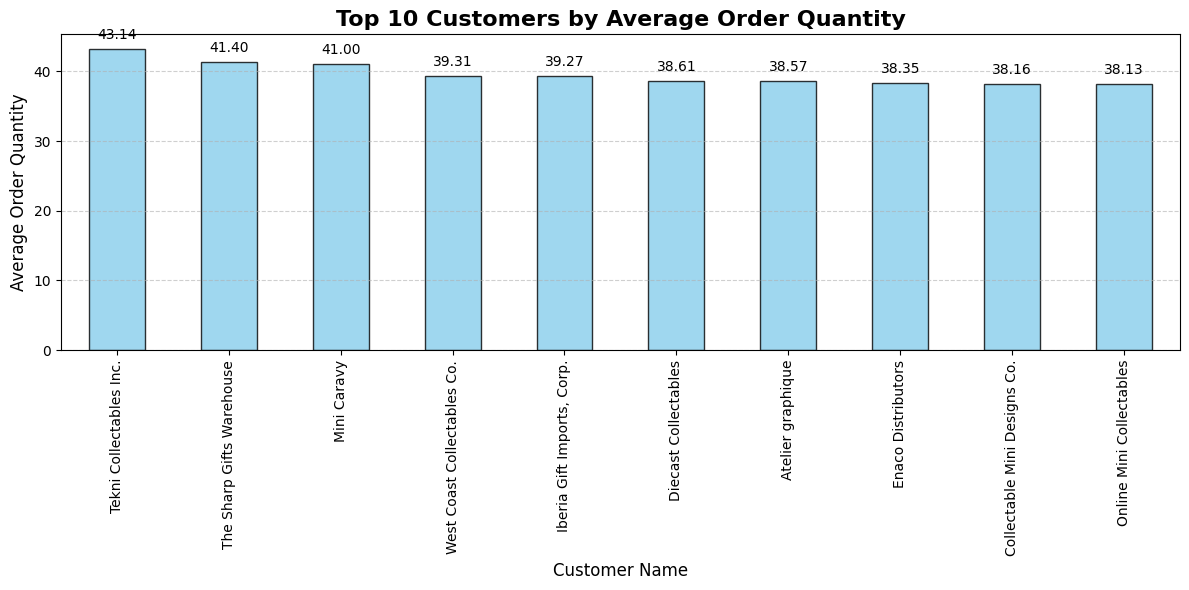

In [19]:
# Group by CUSTOMERNAME and calculate average quantity ordered
avg_quantity_per_customer = data.groupby("CUSTOMERNAME")["QUANTITYORDERED"].mean()

# Sort values in descending order and select top 10
top_customers = avg_quantity_per_customer.sort_values(ascending=False).head(10)

# Plotting the top customers
plt.figure(figsize=(12, 6))
bars = top_customers.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.8)

# Adding title and labels
plt.title("Top 10 Customers by Average Order Quantity", fontsize=16, fontweight="bold")
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Average Order Quantity", fontsize=12)

# Adding value labels on the bars
for index, value in enumerate(top_customers):
    plt.text(index, value + 1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout for better display
plt.tight_layout()

# Display the chart
plt.show()


1. **Tekni Collectables Inc.** has the highest average order quantity at 43.14, indicating a strong demand for their products.
2. The top 3 customers (Tekni Collectables, The Sharp Gifts Warehouse, and Mini Caravy) have average order quantities exceeding 41, showing their significance to overall sales volume.
3. The variation among the top 10 customers is relatively small, suggesting consistent engagement among them.

**Which city has the highest number of orders?**

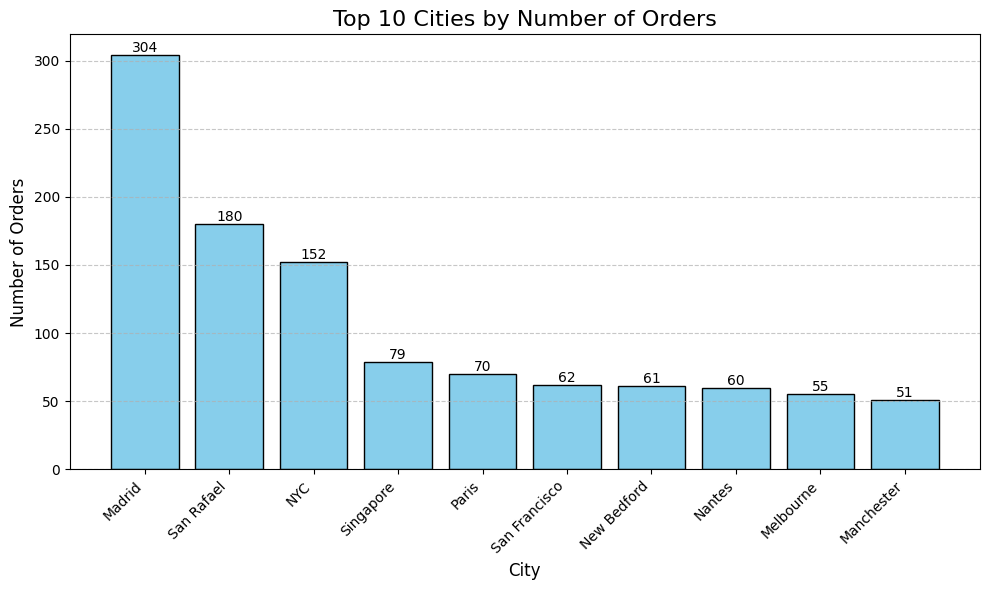

In [20]:
# Group by CITY and count the number of orders for each city
city_order_counts = data.groupby('CITY')['ORDERNUMBER'].count().sort_values(ascending=False)

# Get the top 10 cities with the highest number of orders
top_10_cities = city_order_counts.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_cities.index, top_10_cities, color='skyblue', edgecolor='black')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10)

# Add chart details
plt.title('Top 10 Cities by Number of Orders', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

1. **Madrid** dominates with 304 orders, far exceeding the second-highest, **San Rafael** (180 orders), indicating it is a critical hub for sales activity.
2. **NYC** follows closely with 152 orders, showcasing significant sales engagement in this metropolitan area.
3. The rest of the cities, such as **Singapore**, **Paris**, and **San Francisco**, have moderate order counts but still represent important markets.
4. There is a noticeable drop in order counts after the top three cities, suggesting a concentration of sales in a few key locations.

**How do sales fluctuate by date?**

C:\Users\Ali\AppData\Local\Temp\ipykernel_2064\2838111547.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_date = df.resample('M', on='ORDERDATE')['SALES'].sum()  # Change 'M' to 'Y' or 'Q' for year or quarter


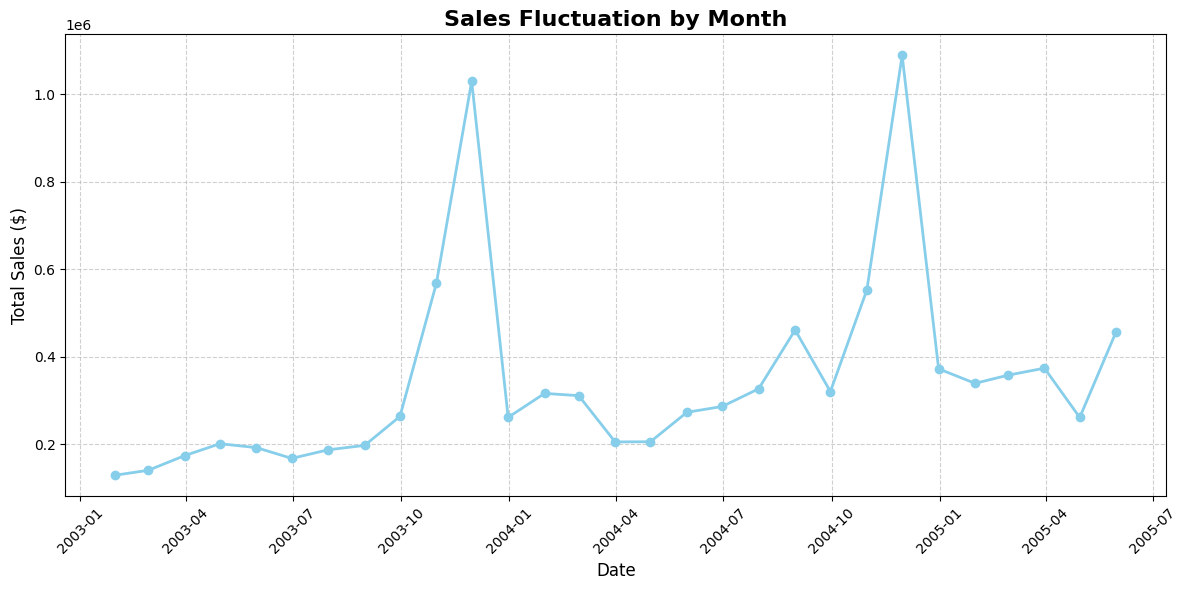

In [21]:
# Assuming `df` is your DataFrame and it contains 'SALES' and 'ORDERDATE'

# Convert ORDERDATE to datetime if not already
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group sales by date (you can change the frequency below: 'M' for month, 'Q' for quarter, 'Y' for year)
sales_by_date = df.resample('M', on='ORDERDATE')['SALES'].sum()  # Change 'M' to 'Y' or 'Q' for year or quarter

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-', color='skyblue', linewidth=2)

# Add labels and title
plt.title('Sales Fluctuation by Month', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Customize ticks for better readability
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_2064\2038440878.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = df.resample('M', on='ORDERDATE')['SALES'].sum()
C:\Users\Ali\AppData\Local\Temp\ipykernel_2064\2038440878.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quantity_trend = df.resample('M', on='ORDERDATE')['QUANTITYORDERED'].sum()


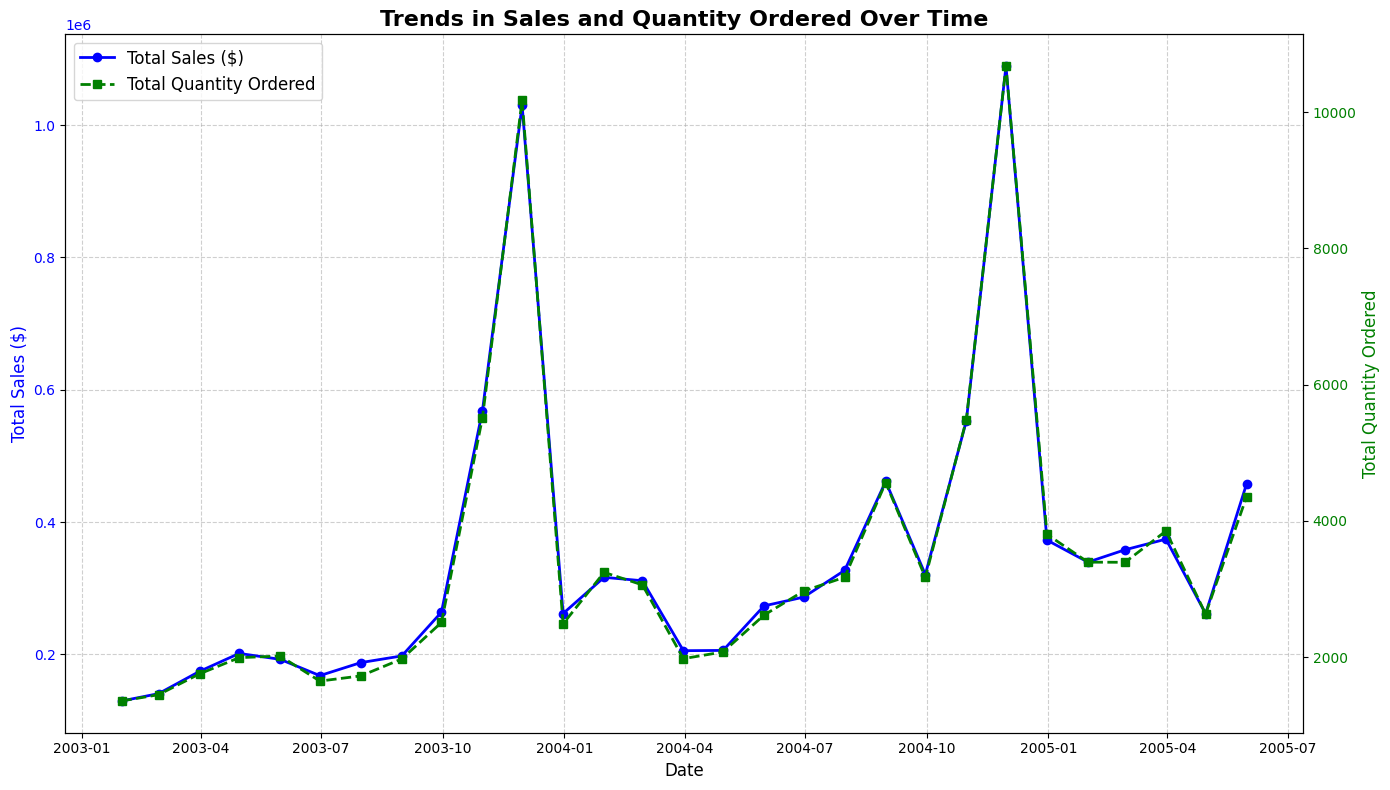

In [22]:
# Group data by month (you can change to 'Y' or 'Q' for year/quarter)
sales_trend = df.resample('M', on='ORDERDATE')['SALES'].sum()
quantity_trend = df.resample('M', on='ORDERDATE')['QUANTITYORDERED'].sum()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Sales on the primary y-axis
ax1.plot(sales_trend.index, sales_trend.values, label="Total Sales ($)", marker='o', linestyle='-', color='blue', linewidth=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Sales ($)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a secondary y-axis for Quantity Ordered
ax2 = ax1.twinx()
ax2.plot(quantity_trend.index, quantity_trend.values, label="Total Quantity Ordered", marker='s', linestyle='--', color='green', linewidth=2)
ax2.set_ylabel('Total Quantity Ordered', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Trends in Sales and Quantity Ordered Over Time', fontsize=16, weight='bold')
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

# Show the plot
plt.show()


 What is the trend in order volume over time?

C:\Users\Ali\AppData\Local\Temp\ipykernel_2064\3767300489.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_volume = df.resample('M', on='ORDERDATE')['ORDERNUMBER'].nunique()  # Change 'M' to 'Y' or 'Q' for year/quarter


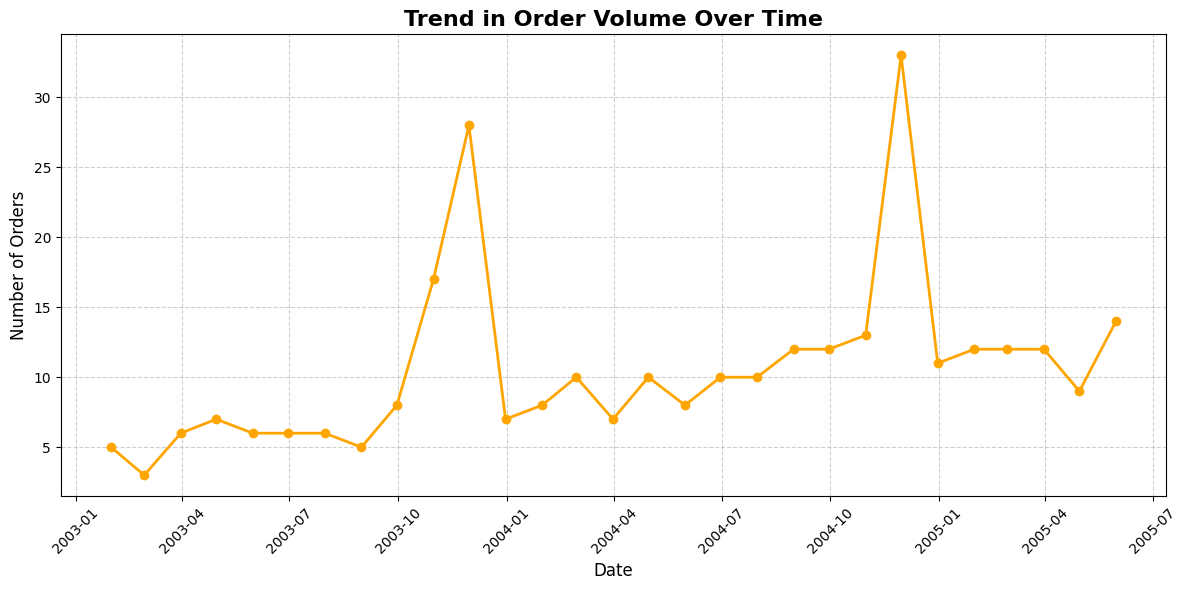

In [ ]:
# Group by date to count the number of orders (using 'ORDERNUMBER')
order_volume = df.resample('M', on='ORDERDATE')['ORDERNUMBER'].nunique()  # Change 'M' to 'Y' or 'Q' for year/quarter

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(order_volume.index, order_volume.values, marker='o', linestyle='-', color='orange', linewidth=2)

# Add labels and title
plt.title('Trend in Order Volume Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Customize ticks for better readability
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Sales fluctuated significantly from 2003 to 2005, with major peaks in January and October 2004 (~$1.0) likely tied to seasonal or promotional events. After high volatility in 2004, sales stabilized around $0.4 in 2005, suggesting a more consistent performance.

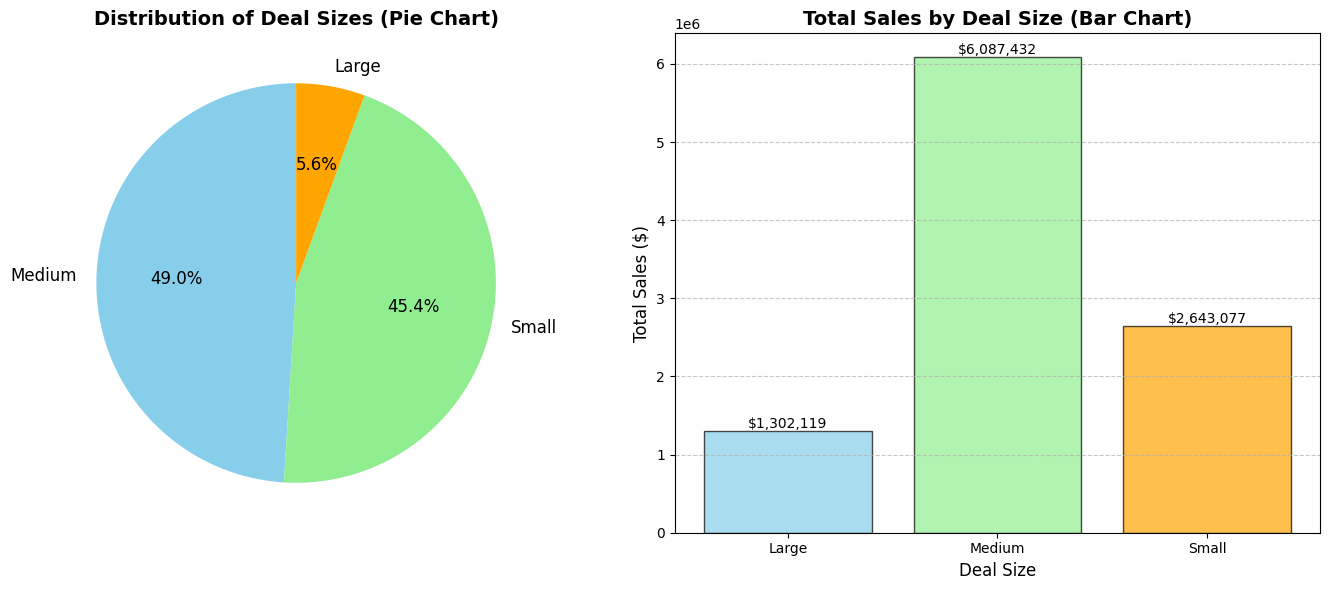

In [24]:
# Calculate the total sales for each deal size
deal_size_sales = df.groupby('DEALSIZE')['SALES'].sum()

# Count the frequency of each deal size
deal_size_counts = df['DEALSIZE'].value_counts()

# Create a figure for the charts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
ax[0].pie(
    deal_size_counts, 
    labels=deal_size_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'orange'],
    textprops={'fontsize': 12}
)
ax[0].set_title('Distribution of Deal Sizes (Pie Chart)', fontsize=14, weight='bold')

# Bar Chart
bars = ax[1].bar(
    deal_size_sales.index, 
    deal_size_sales.values, 
    color=['skyblue', 'lightgreen', 'orange'], 
    edgecolor='black', 
    alpha=0.7
)

# Add labels showing total sales
for bar in bars:
    height = bar.get_height()
    ax[1].text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f"${height:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Configure Bar Chart
ax[1].set_title('Total Sales by Deal Size (Bar Chart)', fontsize=14, weight='bold')
ax[1].set_xlabel('Deal Size', fontsize=12)
ax[1].set_ylabel('Total Sales ($)', fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The pie chart shows that deal sizes are distributed with 49.0% medium, 45.4% small, and 5.6% large. The bar chart indicates total sales of $6,087,432 for medium deals, $2,643,077 for small deals, and $1,302,119 for large deals, highlighting that medium deals contribute the most to total sales despite a similar distribution to small deals.

**Do larger deal sizes contribute more to revenue?**

No, larger deal sizes do not contribute the most to revenue. Despite large deals making up 5.6% of the total deal distribution, medium deals, which account for 49.0%, generate the highest total sales at $6,087,432, compared to $2,643,077 for small deals and $1,302,119 for large deals.

**How does the order status impact sales (e.g., shipped vs. canceled orders)?**

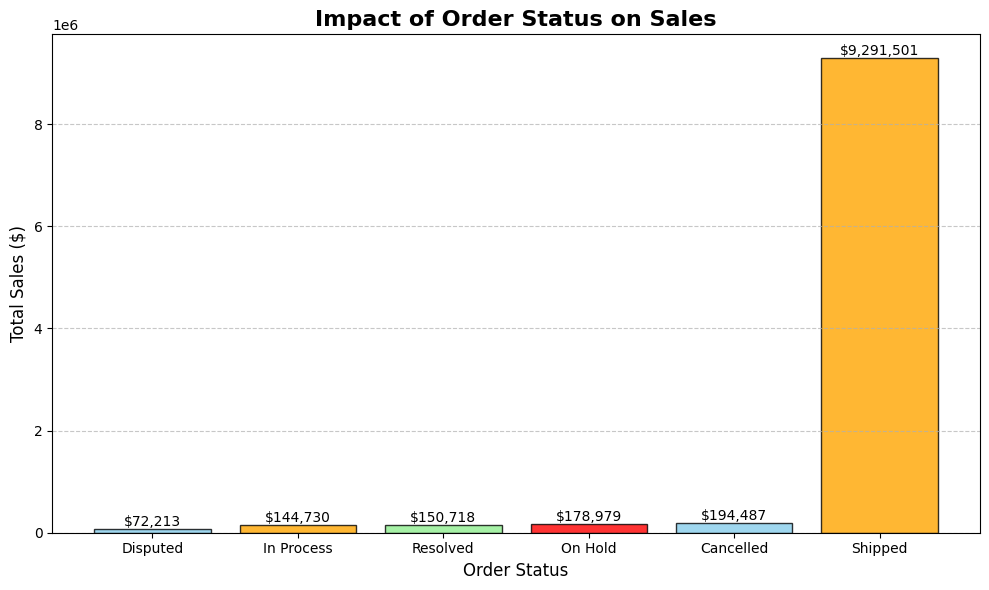

In [25]:
# Grouping data by 'STATUS' and calculating total sales for each status
status_sales = df.groupby('STATUS')['SALES'].sum().sort_values()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar Chart
bars = ax.bar(
    status_sales.index, 
    status_sales.values, 
    color=['skyblue', 'orange', 'lightgreen', 'red'], 
    edgecolor='black', 
    alpha=0.8
)

# Adding labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f"${height:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Chart Configuration
ax.set_title('Impact of Order Status on Sales', fontsize=16, weight='bold')
ax.set_xlabel('Order Status', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Shipped orders contribute the highest total sales at $9,291,501. In contrast, Disputed orders have $72,213, In Process orders have $144,730, Resolved orders have $150,718, On Hold orders have $178,979, and Cancelled orders have $194,487. This indicates that shipped orders significantly drive revenue compared to other order statuses

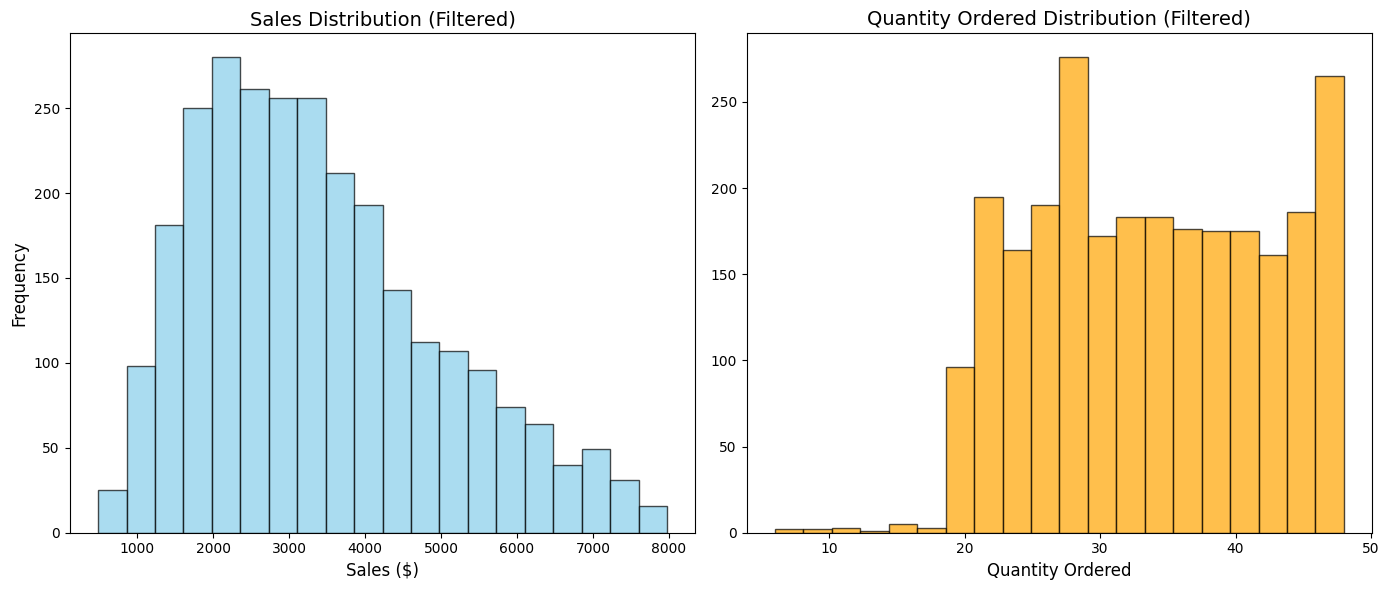

In [26]:
# Define the conditions for filtering
filtered_sales = df[df['SALES'] < 8000]['SALES']
filtered_quantity = df[df['QUANTITYORDERED'] < df['QUANTITYORDERED'].quantile(0.95)]['QUANTITYORDERED']

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot the histogram for SALES
axes[0].hist(filtered_sales, bins=20, color="skyblue", edgecolor="black", alpha=0.7)
axes[0].set_title("Sales Distribution (Filtered)", fontsize=14)
axes[0].set_xlabel("Sales ($)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(False)

# Plot the histogram for QUANTITYORDERED
axes[1].hist(filtered_quantity, bins=20, color="orange", edgecolor="black", alpha=0.7)
axes[1].set_title("Quantity Ordered Distribution (Filtered)", fontsize=14)
axes[1].set_xlabel("Quantity Ordered", fontsize=12)
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The "Sales Distribution" histogram shows most sales are between $0 and $3,000, peaking at $1,000-$2,000, with few sales above $4,000, indicating a preference for smaller transactions. The "Quantity Ordered Distribution" histogram indicates most orders are between 20 and 40 units, peaking at 30-35 units, with rare orders below 10 or above 45 units, suggesting consistent mid-range order sizes.